<a href="https://colab.research.google.com/github/MaheswariAdiningrum/datamining/blob/main/071_Maheswari_Adiningrum_PostTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

# Tabel Tabulasi

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# data yang ada pada list transaksi
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

print("\nTABULASI")
df = pd.DataFrame(data)
df = pd.get_dummies(df.stack()).sum(level=0)
print(df)


TABULASI
    beef  butter  butter milk  canned beer  cling film/bags  curd  \
0      0       0            0            0                0     0   
1      0       0            0            0                0     0   
2      0       0            0            0                0     0   
3      0       0            0            1                0     0   
4      0       0            0            0                0     0   
5      0       0            0            0                0     0   
6      0       0            0            0                0     0   
7      0       0            0            0                0     0   
8      0       0            0            0                0     1   
9      1       0            0            0                0     0   
10     0       1            0            0                0     0   
11     0       0            0            0                0     0   
12     0       0            0            0                0     0   
13     0       0        

<ipython-input-2-9d89c810eca5>:25: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df = pd.get_dummies(df.stack()).sum(level=0)


# Data Support & Confident

In [3]:
# data yang ada pada list transaksi
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

# convert data to one-hot encoding format
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# mencari seberapa sering data itemset (support) muncul dengan algoritma apriori
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# mencari association rules dengan algoritma Association Rule Mining 
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# membuat tabel support dari itemset
df_support = frequent_itemsets
df_support['support'] = df_support['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_support = df_support.rename(columns={"itemsets": "itemset"})
df_support = df_support.set_index('itemset')
print(df_support)

# membuat tabel support dan confidence untuk rules
df_rules = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# filter rules with only one antecedent and one consequent
df_rules = df_rules[df_rules['antecedents'].apply(lambda x: len(x) == 1) & df_rules['consequents'].apply(lambda x: len(x) == 1)]

# format antecedent and consequent columns
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: list(x)[0])
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: list(x)[0])

# set antecedent as index and sort by confidence
df_rules = df_rules.set_index('antecedents')
df_rules = df_rules.sort_values(by=['confidence'], ascending=False)

# create table of support and confidence for filtered rules
df_rules = df_rules[['consequents', 'support', 'confidence']]
df_rules['support'] = df_rules['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_rules['confidence'] = df_rules['confidence'].apply(lambda x: "{:.2f}%".format(x*100))
print("\n")
print("HASIL SUPPORT DAN CONFIDENCE")
print("\n")

print(df_rules)

                                                   support
itemset                                                   
(beef)                                               5.26%
(butter)                                             5.26%
(butter milk)                                        5.26%
(canned beer)                                        5.26%
(cling film/bags)                                    5.26%
...                                                    ...
(sausage, whole milk, semi-finished bread)           5.26%
(yogurt, sausage, semi-finished bread)               5.26%
(yogurt, sausage, whole milk)                        5.26%
(yogurt, whole milk, semi-finished bread)            5.26%
(yogurt, sausage, whole milk, semi-finished bread)   5.26%

[65 rows x 1 columns]


HASIL SUPPORT DAN CONFIDENCE


                             consequents support confidence
antecedents                                                
white bread                         beef   5.26%    100.0

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

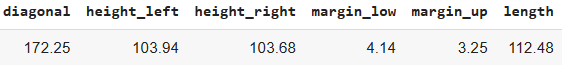
<!-- 1412 -->

In [4]:
import pandas as pd
import math

# Membuat data frame
df = pd.read_csv('deteksi_uang_palsu.csv')

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length       jarak  
0  113.02  162.985541  
1  113.74  163.637621  
2  113.12  163.039278  
3  113.30  163.154696  
4  113.46  163.132317  
5  110.9

In [5]:
import pandas as pd
import math

# load data
df = pd.read_csv("deteksi_uang_palsu.csv")

# hitung jarak dari setiap data terhadap target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
jarak = []
for i in range(len(df)):
    d = 0
    for j in range(1, 7):
        d += (df.iloc[i, j] - target[j-1])**2
    jarak.append(math.sqrt(d))
df['jarak'] = jarak

# urutkan data berdasarkan jarak terdekat
K = int(math.sqrt(len(df)))
df_sorted = df.sort_values(by='jarak').head(K)

# tampilkan data terurut
print(df_sorted)


# Menghitung jumlah nilai True dan False untuk K terdekat
num_true = len(df_sorted[df_sorted["is_genuine"] == True])
num_false = len(df_sorted[df_sorted["is_genuine"] == False])
print("\n")
print("Jumlah True: ", num_true)
print("Jumlah False: ", num_false)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


Jumlah True:  3
Jumlah False:  0


In [6]:
# Mengambil Data Terdekat Dengan Target
data = pd.read_csv("deteksi_uang_palsu.csv")

test_data = pd.DataFrame({
    'is_genuine': [True],
    'diagonal': [172.20],
    'height_left': [104.12],
    'height_right': [103.64],
    'margin_low': [4.38],
    'margin_up': [3.00],
    'length': [113.18]
})

# Menghitung Jarak
distances = pd.DataFrame()
distances['distance'] = ((data.iloc[:,1:] - test_data.iloc[:,1:])**2).sum(axis=1)**0.5

# Menambahkan Kolom Jarak ke Data
data['distance'] = distances['distance']

# Mengurutkan Data Berdasarkan Jarak Terdekat
k = int(math.sqrt(len(data)))
sorted_data = data.sort_values(by='distance').head(k)

# Melakukan Klasifikasi Berdasarkan Mayoritas Kelas
pred_label = sorted_data['is_genuine'].value_counts().idxmax()

# Menampilkan Hasil Prediksi
print("Hasil prediksi: ", pred_label)

Hasil prediksi:  True


# (3) Analisis

> Nama : Maheswari Adiningrum

> Nim : 2109116071


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# **Penyakit Ginjal Kronis**



# **Bussines Understanding**

Dataset ini adalah kumpulan data pasien yang memeriksakan keadaan kesehatan mereka untuk diuji apakah terjangkit penyakit ginjal kronis atau tidak

# Data Understanding

In [ ]:
import pandas as pd

In [7]:
df = pd.read_csv("new_model.csv")
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [9]:
df.isna().sum() 

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

# kolom pada data adalah
# Bp = Blood Presure
# Sg = Specific Gravity
# Al = Albumin
# Su = Sugar
# Rbc = Red Blood Cell
# Bu = Blood Urea
# Sc = Serum Creatine
# Sod = Sodium
# Pot = Pottasium
# Hemo = Hemoglobin
# Wbcc = White Blood Cell Count
# Rbcc = Red Blood Cell Count
# Htn = Hypertension
# Class = Predicted Class

In [10]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

# Data Inisial

In [11]:
df = pd.read_csv("new_model.csv")
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [12]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [13]:
df.tail()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.0,4.9,15.7,6700.0,4.9,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.0,3.5,16.5,7800.0,6.2,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.0,4.4,15.8,6600.0,5.4,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.0,4.9,14.2,7200.0,5.9,0.0,0
399,80.0,1.025,0.0,0.0,1.0,18.0,1.1,141.0,3.5,15.8,6800.0,6.1,0.0,0


In [16]:
# df1 berisi data dengan target Sugar 1.010
df1 = df[df['Sg'] == 1.010] 
print(df1)

        Bp    Sg   Al   Su  Rbc     Bu    Sc     Sod   Pot  Hemo     Wbcc  \
2     80.0  1.01  2.0  3.0  1.0   53.0   1.8  137.53  4.63   9.6   7500.0   
4     80.0  1.01  2.0  0.0  1.0   26.0   1.4  137.53  4.63  11.6   7300.0   
6     70.0  1.01  0.0  0.0  1.0   54.0  24.0  104.00  4.00  12.4   8406.0   
10    60.0  1.01  2.0  4.0  1.0   55.0   4.0  137.53  4.63   9.4   8406.0   
11    70.0  1.01  3.0  0.0  0.0   60.0   2.7  131.00  4.20  10.8   4500.0   
..     ...   ...  ...  ...  ...    ...   ...     ...   ...   ...      ...   
234  100.0  1.01  0.0  0.0  0.0   19.0   1.3  137.53  4.63  15.0   4100.0   
235   70.0  1.01  2.0  0.0  1.0   93.0   2.3  137.53  4.63   7.9   5700.0   
242   70.0  1.01  4.0  3.0  1.0   96.0   6.3  120.00  3.90   9.4  11500.0   
248   70.0  1.01  1.0  3.0  0.0   55.0   1.7  138.00  4.50  12.6  10200.0   
249   90.0  1.01  4.0  1.0  1.0  309.0  13.3  124.00  6.50   3.1   5400.0   

     Rbcc  Htn  Class  
2    4.71  0.0      1  
4    4.60  0.0      1  
6  

In [18]:
# df2 berisi data dengan target Albumin > 0
df2 = [df[df['Al'] > 0]]
print(df2)

[       Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0    80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1    50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2    80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3    70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4    80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   
..    ...    ...  ...  ...  ...   ...  ...     ...   ...   ...     ...   ...   
268  80.0  1.020  1.0  0.0  1.0  49.0  1.0  140.00  5.00  16.3  8500.0  4.90   
280  80.0  1.020  1.0  0.0  1.0  33.0  0.9  144.00  4.50  13.3  8100.0  5.20   
295  70.0  1.020  1.0  0.0  1.0  25.0  0.9  150.00  3.60  15.0  9600.0  6.50   
322  60.0  1.020  1.0  0.0  1.0  40.0  0.5  140.00  4.60  16.0  4500.0  4.90   
346  60.0  1.020  1.0  0.0  1.0  41.0  0.9  141.00  4.40  15.5  4300.0  5.80   

     Htn  Class  
0    1.0      1  
1 

# Describe Data

In [19]:
# df3 berisi data dengan target Serum Creatine > 2
df3 = [df[df['Sc'] > 2]]
print(df3)

[       Bp     Sg   Al   Su  Rbc     Bu     Sc     Sod   Pot  Hemo     Wbcc  \
3    70.0  1.005  4.0  0.0  1.0   56.0   3.80  111.00  2.50  11.2   6700.0   
6    70.0  1.010  0.0  0.0  1.0   54.0  24.00  104.00  4.00  12.4   8406.0   
9    90.0  1.020  2.0  0.0  0.0  107.0   7.20  114.00  3.70   9.5  12100.0   
10   60.0  1.010  2.0  4.0  1.0   55.0   4.00  137.53  4.63   9.4   8406.0   
11   70.0  1.010  3.0  0.0  0.0   60.0   2.70  131.00  4.20  10.8   4500.0   
..    ...    ...  ...  ...  ...    ...    ...     ...   ...   ...      ...   
276  60.0  1.025  0.0  0.0  1.0   57.0   3.07  137.00  4.70  14.0   4500.0   
283  70.0  1.020  0.0  0.0  1.0   57.0   3.07  137.53  4.63  16.4  10800.0   
312  70.0  1.020  0.0  0.0  1.0   57.0   3.07  135.00  4.10  15.3   6300.0   
315  70.0  1.025  0.0  0.0  1.0   57.0   3.07  137.53  4.63  13.8   7800.0   
334  80.0  1.025  0.0  0.0  1.0   57.0   3.07  136.00  3.50  15.4   5600.0   

     Rbcc  Htn  Class  
3    3.90  1.0      1  
6    4.71  0.0

In [20]:
# df4 berisi data yang targetnya Class = 1
df4 = [df[df['Class'] == 1]]
print(df4)

[        Bp     Sg   Al   Su  Rbc     Bu    Sc     Sod   Pot   Hemo     Wbcc  \
0     80.0  1.020  1.0  0.0  1.0   36.0   1.2  137.53  4.63  15.40   7800.0   
1     50.0  1.020  4.0  0.0  1.0   18.0   0.8  137.53  4.63  11.30   6000.0   
2     80.0  1.010  2.0  3.0  1.0   53.0   1.8  137.53  4.63   9.60   7500.0   
3     70.0  1.005  4.0  0.0  1.0   56.0   3.8  111.00  2.50  11.20   6700.0   
4     80.0  1.010  2.0  0.0  1.0   26.0   1.4  137.53  4.63  11.60   7300.0   
..     ...    ...  ...  ...  ...    ...   ...     ...   ...    ...      ...   
245  100.0  1.020  1.0  0.0  1.0   79.0   5.3  135.00  6.30   6.30   7200.0   
246  110.0  1.015  3.0  0.0  0.0  215.0  15.2  120.00  5.70   8.60   5000.0   
247   90.0  1.025  1.0  0.0  1.0   18.0   1.2  140.00  4.20  12.53   8406.0   
248   70.0  1.010  1.0  3.0  0.0   55.0   1.7  138.00  4.50  12.60  10200.0   
249   90.0  1.010  4.0  1.0  1.0  309.0  13.3  124.00  6.50   3.10   5400.0   

     Rbcc  Htn  Class  
0    5.20  1.0      1  
1 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [24]:
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())

In [25]:
tampil("Al")

Nilai minimum         : 0.0
Nilai maksimum        : 5.0


In [26]:
tampil("Sg")

Nilai minimum         : 1.005
Nilai maksimum        : 1.025


In [27]:
tampil("Sc")

Nilai minimum         : 0.4
Nilai maksimum        : 76.0


In [28]:
tampil("Pot")

Nilai minimum         : 2.5
Nilai maksimum        : 47.0


In [29]:
tampil("Sod")

Nilai minimum         : 4.5
Nilai maksimum        : 163.0


# Explore Data

# Visualisasi

In [45]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [32]:
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


<Axes: xlabel='Al', ylabel='count'>

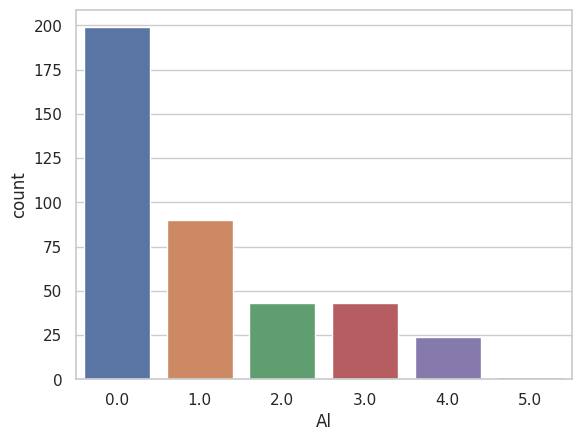

In [33]:
sns.countplot(data=df,x="Al")

<Axes: xlabel='Class', ylabel='count'>

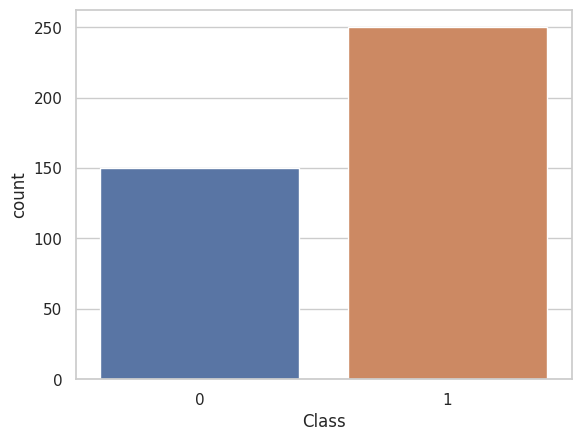

In [37]:
sns.countplot(data=df,x="Class")

<Axes: xlabel='Sg'>

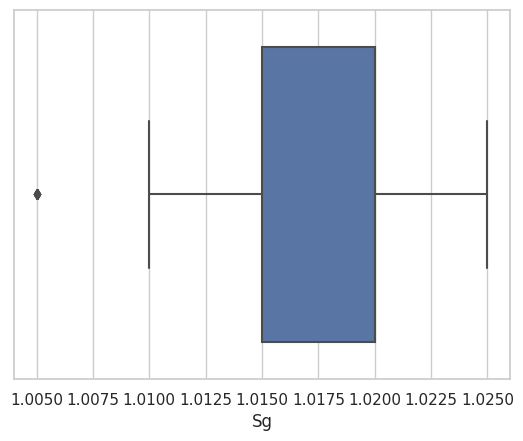

In [40]:
sns.boxplot(data=df,x="Sg")

<Axes: xlabel='Al', ylabel='Sc'>

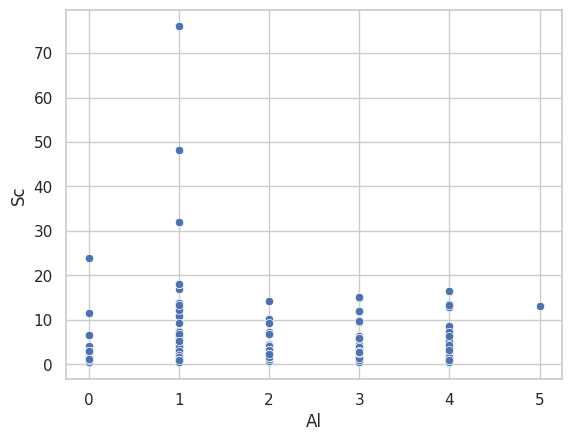

In [41]:
sns.scatterplot(data=df,x="Al",y="Sc")

In [44]:
px.pie(df,names="Pot")

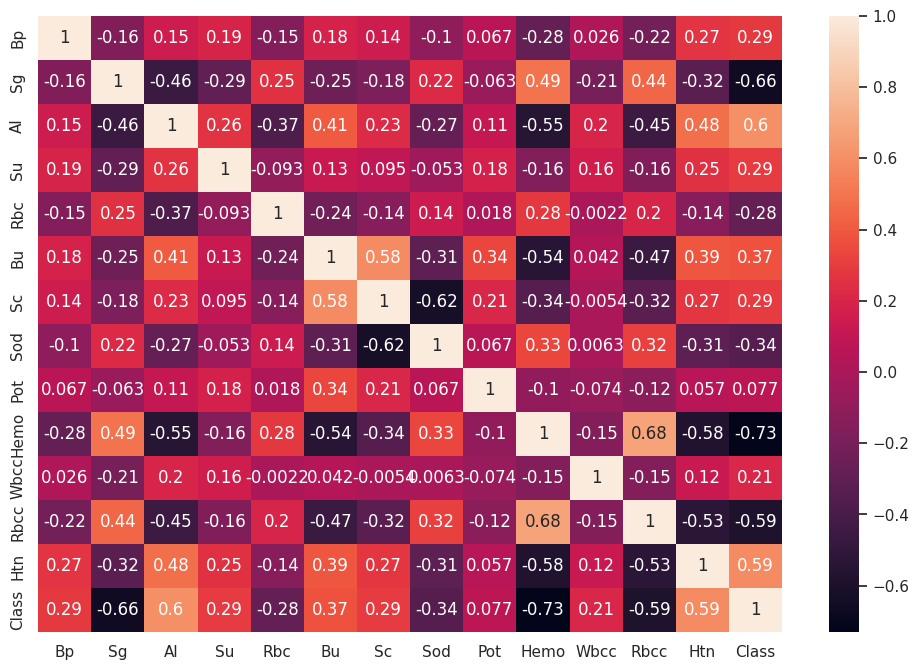

In [46]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
plt.show()

# Verify Data Qualify

In [47]:
# mengecek missing value
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


In [48]:
# mengecek duplikasi data
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [49]:
# mengeck outliners
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 Bp       36
Sg        7
Al        0
Su       61
Rbc      47
Bu       41
Sc       44
Sod      18
Pot      14
Hemo      2
Wbcc     17
Rbcc     75
Htn       0
Class     0
dtype: int64


In [50]:
# menngecek tipe data
print("Data types:\n", df.dtypes)

Data types:
 Bp       float64
Sg       float64
Al       float64
Su       float64
Rbc      float64
Bu       float64
Sc       float64
Sod      float64
Pot      float64
Hemo     float64
Wbcc     float64
Rbcc     float64
Htn      float64
Class      int64
dtype: object


# Data Preparation

Select Data

In [51]:
import pandas as pd

In [52]:
df = pd.read_csv("new_model.csv")
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [54]:
# Membuat hanya menampikan 2 Kolom
selected_data = df[["Al", "Sc"]]

# Menampilkan Perintah
print(selected_data.head())

    Al   Sc
0  1.0  1.2
1  4.0  0.8
2  2.0  1.8
3  4.0  3.8
4  2.0  1.4


In [55]:
# Membuat hanya menampikan 3 Kolom
selected_data = df[["Al", "Sc", "Class"]]

# Menampilkan Perintah
print(selected_data.head())

    Al   Sc  Class
0  1.0  1.2      1
1  4.0  0.8      1
2  2.0  1.8      1
3  4.0  3.8      1
4  2.0  1.4      1


# Clean Data

In [56]:
df.isna().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [57]:
df.isna().sum() / len(df) * 100

Bp       0.0
Sg       0.0
Al       0.0
Su       0.0
Rbc      0.0
Bu       0.0
Sc       0.0
Sod      0.0
Pot      0.0
Hemo     0.0
Wbcc     0.0
Rbcc     0.0
Htn      0.0
Class    0.0
dtype: float64